## <font color=blue> Melanoma Image Classification using CNN </font> - by Sankalp Gupta

<font color=blue> Problem statement: </font> To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

<font color=blue> Instructions: </font>
- Importing Skin Cancer Data
- To do: Take necessary actions to read the data
- Importing all the important libraries

#### <font color=blue> Step 0: </font> Connect to the Github repository to access data files

In [1]:
#This is required to clone the data files from github into google colab.
#This has to be executed everytime, as google colab runtime does not store data files, once the program session is removed
!git clone https://github.com/sagupta153/melanoma_identification

Cloning into 'melanoma_identification'...
remote: Enumerating objects: 2248, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 2248 (delta 6), reused 20 (delta 5), pack-reused 2224
Receiving objects: 100% (2248/2248), 753.69 MiB | 34.52 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (2358/2358), done.


In [2]:
#Verify the present working directory. This helps in setting the path for the image data files
!pwd

/content


In [3]:
#This is the parent folder where the program and data files are stored. 
parent_path = '/content/melanoma_identification'     #Use this when executing the program on google colab
#parent_path = '.'                                   #Use this when executing the program on local PC

#### <font color=blue> Step 1: </font> Import necessary libraries

In [4]:
import os, pathlib, glob, shutil

import numpy as np, pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras

<font color=blue> Notes: </font>
- This assignment uses a dataset of about 2357 images of skin cancer types.
- The dataset contains 9 sub-directories in each train and test subdirectories.
- The 9 sub-directories contains the images of 9 skin cancer types respectively.

#### <font color=blue> Step 2: </font> Connect with the Image Data directory

In [5]:
#Set the path where the image data files will be found
data_path  = parent_path + '/melanomas'

train_path = data_path + '/Train'
test_path  = data_path + '/Test'

In [6]:
#This is just to ensure that the program does not crash in case the image files folder is not set properly
def crete_dir_if_not_existing (f):
    if not os.path.exists(f):
        print ('Dir ' + f + ' does not exist. Creating one')
        os.mkdir(f)
    else:
        print ('Dir ' + f + ' exists')

In [7]:
#Create directories if they do not exist - This is done to prevent the program from crashing
crete_dir_if_not_existing(data_path)
crete_dir_if_not_existing(train_path)
crete_dir_if_not_existing(test_path)

Dir /content/melanoma_identification/melanomas exists
Dir /content/melanoma_identification/melanomas/Train exists
Dir /content/melanoma_identification/melanomas/Test exists


In [8]:
#Initialise the path class corresponding to the path-string for image data files
train_dir = pathlib.Path(train_path)
test_dir  = pathlib.Path(test_path)

In [9]:
#Count the number of image files
image_count_train = len(list(train_dir.glob('*/*.jpg')))
image_count_test  = len(list(test_dir.glob('*/*.jpg')))

print("Number of Training Images: ", f"{image_count_train:>4}")
print("Number of Test     Images: ", f"{image_count_test:>4}")
print('-'*32)
print("Total Number of    Images: ", f"{(image_count_train + image_count_test):>4}")

Number of Training Images:  2239
Number of Test     Images:   118
--------------------------------
Total Number of    Images:  2357


#### <font color=blue> Step 3: </font> Load images using image_dataset_from_directory utility from keras.preprocessing

<font color=blue> Instructions: </font>
- Write your train dataset here
- Use 80% of the images for training, and 20% for validation.
- Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
- Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

In [10]:
#This keras utility is a convenient way of loading image files
from tensorflow.keras.utils import image_dataset_from_directory

In [11]:
batch_size = 32
img_height, img_width = 180, 180

In [12]:
#Creating Training Dataset - 80% of the images used for training
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
#Creating Validation Dataset - 20% of the images used for validation
val_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


<font color=blue> Instructions: </font>
- List out all the classes of skin cancer and store them in a list. 
- You can find the class names in the class_names attribute on these datasets. 
- These correspond to the directory names in alphabetical order.

In [14]:
#Save all the class names in a list
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### <font color=blue> Step 4: </font> Visualize one sample image for each class

<font color=blue> Instructions: </font>
- Visualize the data
- Todo, create a code to visualize one instance of all the nine classes present in the dataset
- your code goes here, you can use training or validation data to visualize

In [15]:
#Check the number of classes
num_classes = len (class_names)
num_classes

9

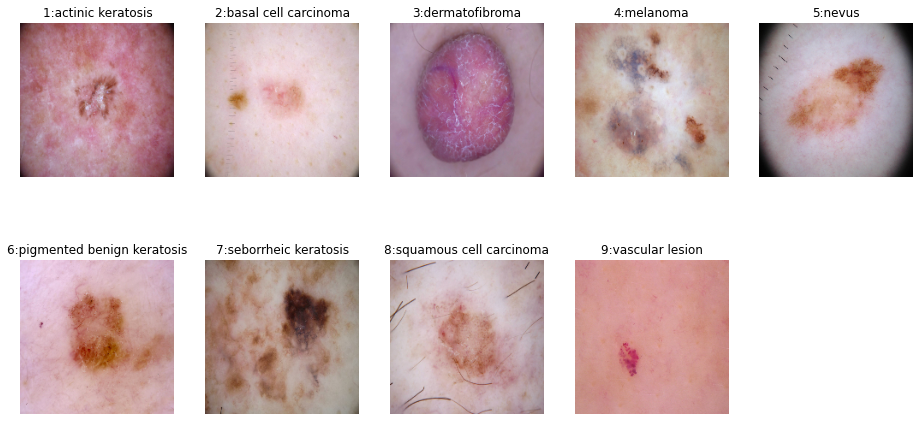

In [16]:
#Display one image from each of the classes
plt.figure(figsize=(16, 8))

for i in range(num_classes):
    class_ds = train_ds.filter(lambda _, l: tf.math.equal(l[0], i))
    ax = plt.subplot(2, 5, i+1)
    
    for image, label in class_ds.take(1):    
        plt.imshow(image[0].numpy().astype('uint8'))
        
        l = label.numpy()[0]
        title_str = str (l+1) + ':' + class_names[l]
        plt.title(title_str)
        
        plt.axis('off')

#### <font color=blue> Step 5: </font> Visualize Class imbalance

In [17]:
#Count the number of images in each class
counts = []
for c in class_names:
    class_dir  = pathlib.Path(train_path + '/' + c)
    class_count = len(list(class_dir.glob('*.jpg')))
    counts.append (class_count)

In [18]:
#Convert the counts to % value
counts = np.array (counts) * 100 / np.sum (counts)

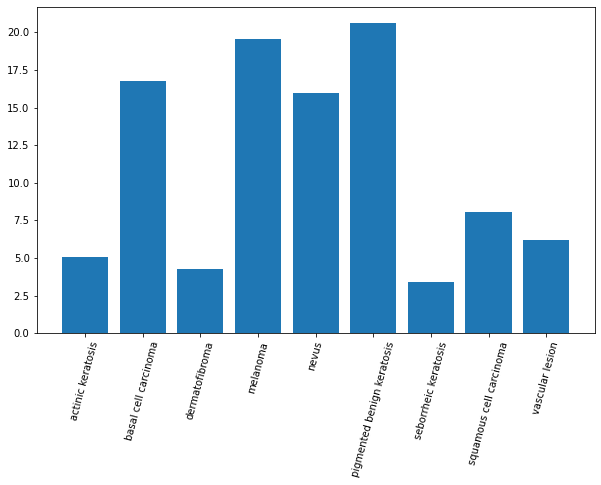

In [19]:
#Display % of data from each class
plt.figure(figsize=(10, 6))

plt.bar (class_names, counts)
plt.xticks (rotation=75)
plt.show()

<font color=blue> Observation: </font> There is a lot of imbalance in the classes. The class "seborrheic keratosis" contributes only about 3% of the data whereas the class "pigmented benign keratosis" contributes more than 20% of the data

#### <font color=blue> Step 6: </font> Build CNN Model

<font color=blue> Notes: </font>
- The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

- Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

- Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<font color=blue> Instructions: </font>
- Create the model
- Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. 
- Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). 
- The RGB channel values are in the [0, 255] range. 
- This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

##### <font color=blue> Import Keras libraries for CNN Model building

In [21]:
from keras import layers
from keras.models import Sequential, Model, load_model

In [22]:
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Input, Add,Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import L2

##### <font color=blue> Define a function to visualize model results

In [23]:
def visualize_results (history, epochs):
    epochs_range = range(epochs)
    plt.figure(figsize=(16, 8))

    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc,      label='Training Accuracy')
    plt.plot(epochs_range, val_acc,  label='Validation Accuracy')
    plt.xlabel ('Epoch')
    plt.ylabel ('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss,     label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel ('Epoch')
    plt.ylabel ('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

In [24]:
#define a function to build the model
def get_model (bn=False, dropout=False, lc2=False, features_256=False):
    model = Sequential()
    model.add(Rescaling(1.0/255, input_shape=(180,180,3)))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (180,180,3)))
    if bn: model.add(BatchNormalization());
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    if bn: model.add(BatchNormalization());
    model.add(MaxPooling2D(pool_size=(2,2)))
    if dropout: model.add(Dropout(0.25))

    model.add(Conv2D(filters =128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    if bn: model.add(BatchNormalization());
    model.add(Conv2D(filters =128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    if bn: model.add(BatchNormalization());
    model.add(MaxPooling2D(pool_size=(2,2)))
    if dropout: model.add(Dropout(0.25))

    if features_256:
        model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same', activation ='relu'))
        if bn: model.add(BatchNormalization());
        model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same', activation ='relu'))
        if bn: model.add(BatchNormalization());
        model.add(MaxPooling2D(pool_size=(2,2)))
        if dropout: model.add(Dropout(0.25))

    model.add(Flatten())
    if lc2:
        model.add(Dense(512, kernel_regularizer=L2(0.01)))
    else:
        model.add(Dense(512))
    model.add(Activation('relu'))
    if dropout: model.add(Dropout(0.50))
    model.add(Dense(num_classes, activation = "softmax"))
    
    return model

##### <font color=brown> Model 1: </font> 4 Conv layers, 2 Maxpool, 1 Dense, 1 Output-Softmax Layer

In [25]:
#Build the model
model = get_model()

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       147584    
                                                        

In [26]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 35s 234ms/step - loss: 2.0442 - accuracy: 0.2003 - val_loss: 2.0483 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 10s 172ms/step - loss: 2.0150 - accuracy: 0.2338 - val_loss: 1.9900 - val_accuracy: 0.2729
Epoch 3/20
56/56 [==============================] - 10s 173ms/step - loss: 1.9864 - accuracy: 0.2606 - val_loss: 1.9504 - val_accuracy: 0.2752
Epoch 4/20
56/56 [==============================] - 10s 174ms/step - loss: 1.9577 - accuracy: 0.2695 - val_loss: 1.8781 - val_accuracy: 0.3177
Epoch 5/20
56/56 [==============================] - 10s 177ms/step - loss: 1.9122 - accuracy: 0.3086 - val_loss: 1.9235 - val_accuracy: 0.2908
Epoch 6/20
56/56 [==============================] - 10s 177ms/step - loss: 1.8873 - accuracy: 0.2846 - val_loss: 1.7884 - val_accuracy: 0.3960
Epoch 7/20
56/56 [==============================] - 10s 179ms/step - loss: 1.8394 - accuracy: 0.3170 - val_loss: 1.7262 - val_accuracy: 0.4004

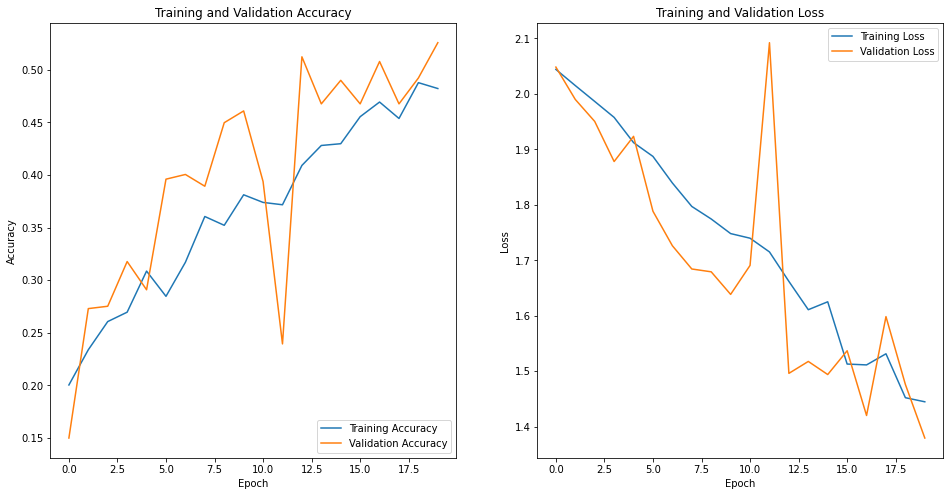

In [27]:
#Visualize the model results
visualize_results (history, epochs)

<font color=blue> Observation: </font> This is the simplest model, without normalization and without dropouts. After 20 epochs, validation accuracy of about 52.6% is achieved. Both training and validation accuracy have been steadily rising, and are similar in value. This suggests that there is no overfitting. But there is the possibility of underfitting

##### <font color=brown> Model 2: </font> Added Batch Normalization after each Conv layer

In [28]:
#Build the model
model = get_model(bn=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 64)      

In [29]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 18s 305ms/step - loss: 7.0991 - accuracy: 0.3092 - val_loss: 3.1673 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 12s 214ms/step - loss: 1.4795 - accuracy: 0.4643 - val_loss: 11.1273 - val_accuracy: 0.1566
Epoch 3/20
56/56 [==============================] - 12s 211ms/step - loss: 1.1720 - accuracy: 0.5753 - val_loss: 9.0516 - val_accuracy: 0.1790
Epoch 4/20
56/56 [==============================] - 12s 217ms/step - loss: 0.9067 - accuracy: 0.6652 - val_loss: 6.2599 - val_accuracy: 0.2192
Epoch 5/20
56/56 [==============================] - 12s 222ms/step - loss: 0.6824 - accuracy: 0.7556 - val_loss: 3.6950 - val_accuracy: 0.2819
Epoch 6/20
56/56 [==============================] - 12s 218ms/step - loss: 0.4863 - accuracy: 0.8198 - val_loss: 3.1165 - val_accuracy: 0.3982
Epoch 7/20
56/56 [==============================] - 12s 215ms/step - loss: 0.3659 - accuracy: 0.8683 - val_loss: 2.7717 - val_accuracy: 0.418

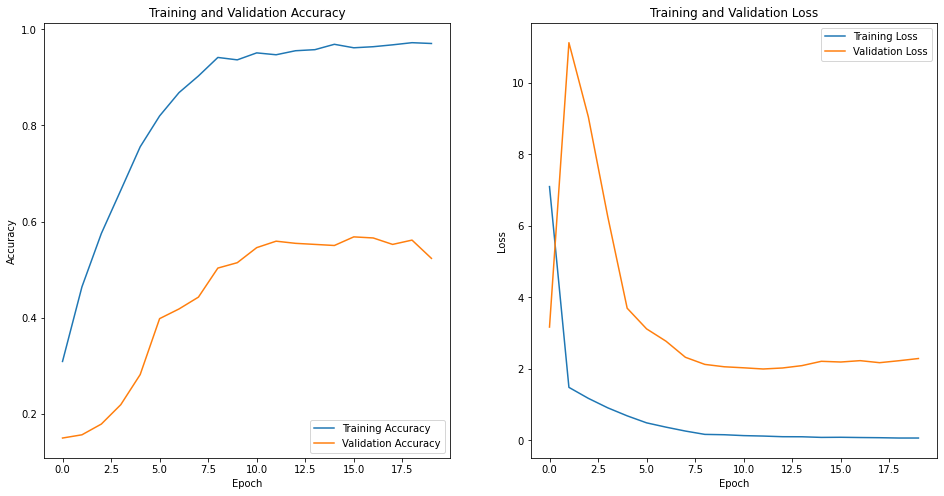

In [30]:
#Visualize the model results
visualize_results (history, epochs)

<font color=blue> Observation: </font> This model uses normalization but not dropouts. After about 8-9 epochs, validation accuracy of about 52.4% is achieved, but it remains steady thereafter. Training accuracy keeps on increasing and goes up to 97%. This suggests that there is overfitting.

##### <font color=brown> Model 3: </font> Add Dropouts - to remove overfitting

In [31]:
#Build the model
model = get_model(bn=True, dropout=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_4 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_5 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)      

In [32]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 13s 226ms/step - loss: 25.7444 - accuracy: 0.2171 - val_loss: 10.6816 - val_accuracy: 0.1432
Epoch 2/20
56/56 [==============================] - 12s 220ms/step - loss: 2.5352 - accuracy: 0.2662 - val_loss: 3.6750 - val_accuracy: 0.1790
Epoch 3/20
56/56 [==============================] - 12s 216ms/step - loss: 1.9598 - accuracy: 0.3404 - val_loss: 6.6297 - val_accuracy: 0.2438
Epoch 4/20
56/56 [==============================] - 12s 218ms/step - loss: 1.8224 - accuracy: 0.3962 - val_loss: 8.1853 - val_accuracy: 0.2371
Epoch 5/20
56/56 [==============================] - 13s 224ms/step - loss: 1.6499 - accuracy: 0.4330 - val_loss: 6.4188 - val_accuracy: 0.2394
Epoch 6/20
56/56 [==============================] - 12s 221ms/step - loss: 1.5764 - accuracy: 0.4492 - val_loss: 4.6212 - val_accuracy: 0.2394
Epoch 7/20
56/56 [==============================] - 12s 219ms/step - loss: 1.4267 - accuracy: 0.5056 - val_loss: 2.9786 - val_accuracy: 0.29

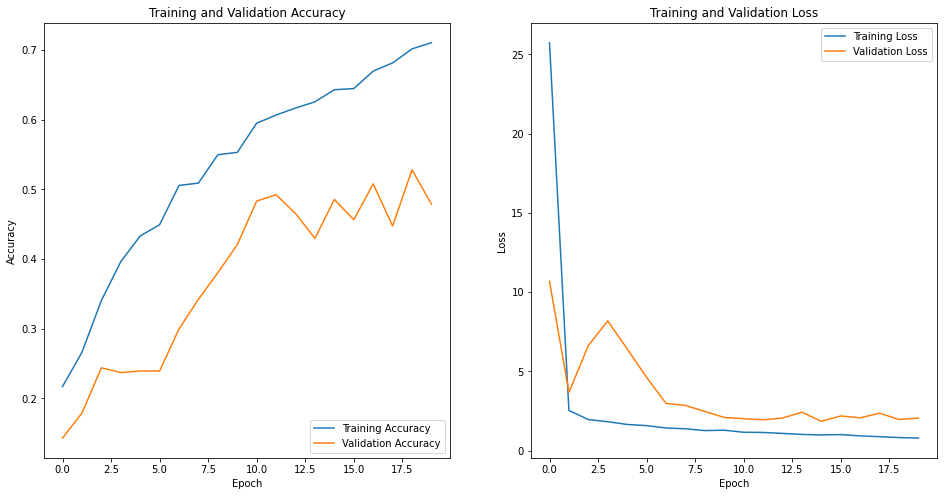

In [33]:
#Visualize the model results
visualize_results (history, epochs)

<font color=blue> Observation: </font> This model is with normalization as well as dropouts. After about 20 epochs, validation accuracy of about 47.9% is achieved. Both training and validation accuracy have been steadily rising, and are similar in value, but are near to each other. The overfitting of the previous model is rectified to some extent

##### <font color=brown> Model 4: </font> Add LC2 regularizer

In [34]:
#Build the model
model = get_model(bn=True, dropout=True, lc2=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_8 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_9 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 64)      

In [35]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 16s 253ms/step - loss: 34.6518 - accuracy: 0.2472 - val_loss: 15.0928 - val_accuracy: 0.1566
Epoch 2/20
56/56 [==============================] - 14s 245ms/step - loss: 13.0171 - accuracy: 0.3583 - val_loss: 19.3831 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 14s 243ms/step - loss: 12.1810 - accuracy: 0.3934 - val_loss: 17.5024 - val_accuracy: 0.1991
Epoch 4/20
56/56 [==============================] - 14s 248ms/step - loss: 11.7675 - accuracy: 0.4615 - val_loss: 16.3188 - val_accuracy: 0.2349
Epoch 5/20
56/56 [==============================] - 14s 247ms/step - loss: 11.4301 - accuracy: 0.4799 - val_loss: 15.1090 - val_accuracy: 0.3199
Epoch 6/20
56/56 [==============================] - 14s 245ms/step - loss: 11.1449 - accuracy: 0.5156 - val_loss: 13.6102 - val_accuracy: 0.3132
Epoch 7/20
56/56 [==============================] - 14s 245ms/step - loss: 10.8217 - accuracy: 0.5458 - val_loss: 12.1296 - val_ac

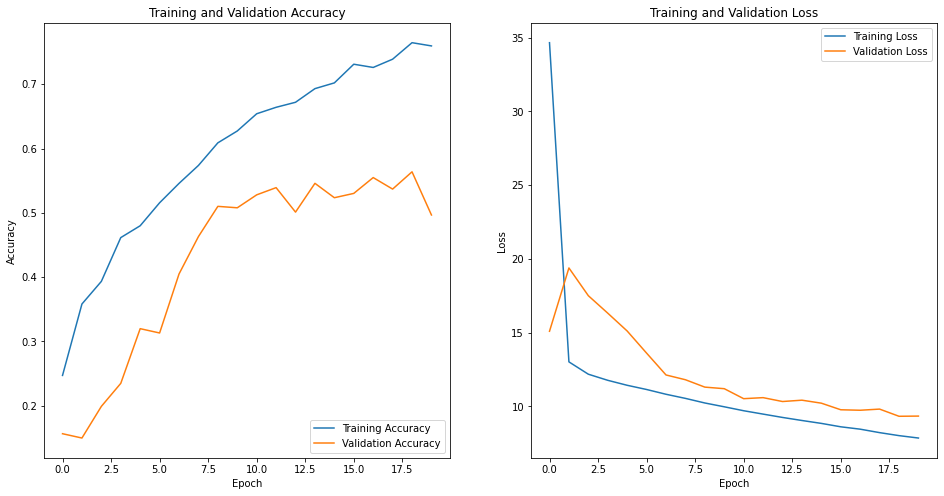

In [36]:
#Visualize the model results
visualize_results (history, epochs)

<font color=blue> Observation: </font> This model uses LC2 regulariser. All other things being the same, overall validation accuracy has not increased much. It is 49.7%. LC2 is not required

<font color=blue> Instructions: </font>
- Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Write your findings here

- Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
- Your code goes here
- Todo, visualize how your augmentation strategy works for one instance of training image.
- Your code goes here

<font color=blue> Todo: </font> Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
Todo: Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

##### <font color=brown> Model 5: </font> Using Augmentor to create an enhanced dataset

<font color=blue> 1. </font> Install and import Augmentor

In [37]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import Augmentor

<font color=blue> 2. </font> Remove 'output' folders created during any previous execution of this program 

In [39]:
#Removing output folders from previous execution 
for c in class_names:
    f = train_path + '/' + c + '/output' 
    if os.path.exists(f):
        print ('Dir ' + f + ' exists from previous program execution. Removing the same')
        for root, dirs, files in os.walk(f, topdown=False):
            for name in files:
                os.remove(os.path.join(root, name))
            for name in dirs:
                os.rmdir(os.path.join(root, name))
    else:
        print ('Dir ' + f + ' does not exist from previous program execution.')

Dir /content/melanoma_identification/melanomas/Train/actinic keratosis/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/basal cell carcinoma/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/dermatofibroma/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/melanoma/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/nevus/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/pigmented benign keratosis/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/seborrheic keratosis/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/squamous cell carcinoma/output does not exist from previous program execut

<font color=blue> 3. </font> Create and execute Augmentor pipeline 

<font color=blue> Note: </font> 
To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [40]:
for i in class_names:
    p = Augmentor.Pipeline(train_path + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FA3A834FF10>: 100%|██████████| 500/500 [00:18<00:00, 26.96 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3A82FC9D0>: 100%|██████████| 500/500 [00:19<00:00, 25.76 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3A831B890>: 100%|██████████| 500/500 [00:20<00:00, 24.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FA3A8F74F10>: 100%|██████████| 500/500 [01:29<00:00,  5.60 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=962x722 at 0x7FA3A831ECD0>: 100%|██████████| 500/500 [01:25<00:00,  5.86 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3A93560D0>: 100%|██████████| 500/500 [00:16<00:00, 30.87 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FA3A832FED0>: 100%|██████████| 500/500 [00:40<00:00, 12.38 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3A8F3D450>: 100%|██████████| 500/500 [00:16<00:00, 30.39 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3A92944D0>: 100%|██████████| 500/500 [00:16<00:00, 30.99 Samples/s]


<font color=blue> Note: </font> 
Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

<font color=blue> Note: </font> 
Lets see the distribution of augmented data after adding new images to the original training data.

<font color=blue> 4. </font> Check class imbalance after augmentation

In [41]:
counts = []
for c in class_names:
    class_dir1  = pathlib.Path(train_path + '/' + c)
    class_dir2  = pathlib.Path(train_path + '/' + c + '/output')
    class_count = len(list(class_dir1.glob('*.jpg'))) + len(list(class_dir2.glob('*.jpg')))
    counts.append (class_count)

In [42]:
counts = np.array (counts) * 100 / np.sum (counts)

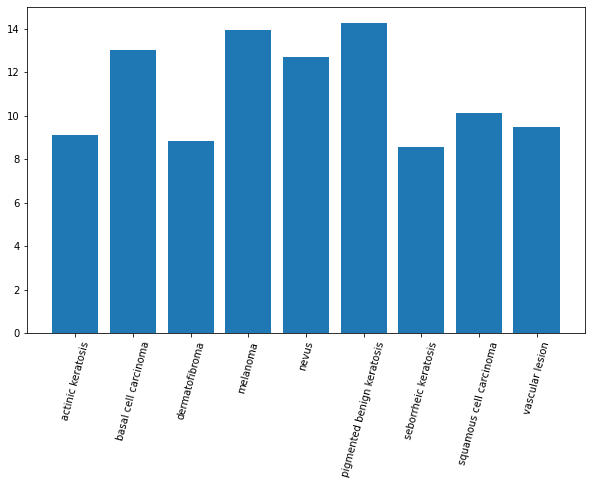

In [43]:
#Display % of data from each class
plt.figure(figsize=(10, 6))

plt.bar (class_names, counts)
plt.xticks (rotation=75)
plt.show()

<font color=blue> Observation: </font> Before augmentation, there was a lot of imbalance in the classes. Earlier, the class "seborrheic keratosis" contributed only about 3% of the data whereas now it makes up about 9% of the data. Earlier the class "pigmented benign keratosis" contributed more than 20% of the data, whereas now it makes up about 14% of the data

<font color=blue> Instructions: </font>
So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

Todo: Train the model on the data created using Augmentor

<font color=blue> 5. </font> Re-create Training and Validation datasets, including the newly created images

In [44]:
#Creating Training Dataset - 80% of the images used for training
train_ds_aug = image_dataset_from_directory(
    train_dir,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [45]:
#Creating Validation Dataset - 20% of the images used for validation
val_ds_aug = image_dataset_from_directory(
    train_dir,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


<font color=blue> 6. </font> Build and Test the model 

In [46]:
#Build the model
model = get_model(bn=True, dropout=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_12 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_13 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 64)      

In [47]:
#Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/30
56/56 [==============================] - 13s 223ms/step - loss: 22.0737 - accuracy: 0.2238 - val_loss: 6.8084 - val_accuracy: 0.1208
Epoch 2/30
56/56 [==============================] - 12s 222ms/step - loss: 2.2375 - accuracy: 0.3125 - val_loss: 5.8604 - val_accuracy: 0.1611
Epoch 3/30
56/56 [==============================] - 12s 223ms/step - loss: 2.0160 - accuracy: 0.3471 - val_loss: 3.4372 - val_accuracy: 0.2058
Epoch 4/30
56/56 [==============================] - 13s 228ms/step - loss: 1.7489 - accuracy: 0.4040 - val_loss: 2.8767 - val_accuracy: 0.2707
Epoch 5/30
56/56 [==============================] - 12s 221ms/step - loss: 1.6892 - accuracy: 0.4302 - val_loss: 2.1946 - val_accuracy: 0.3356
Epoch 6/30
56/56 [==============================] - 12s 216ms/step - loss: 1.5641 - accuracy: 0.4492 - val_loss: 2.2421 - val_accuracy: 0.3333
Epoch 7/30
56/56 [==============================] - 12s 219ms/step - loss: 1.4645 - accuracy: 0.4972 - val_loss: 2.2236 - val_accuracy: 0.371

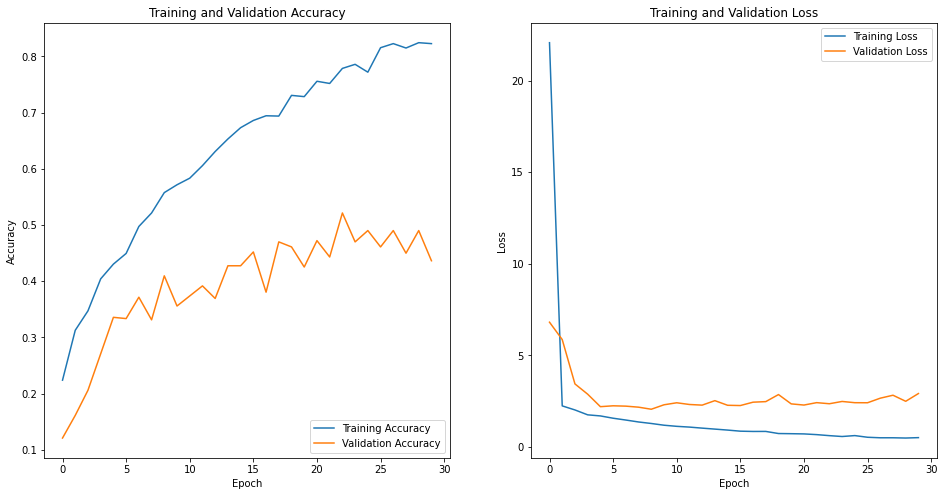

In [48]:
#Visualize the model results
visualize_results (history, epochs)

<font color=blue> Observation: </font> Using augmentation has resulted in reducing class imbalance. However, there is no gain in validation accuracy. In fact it has dropped

##### <font color=brown> Model 6: </font> Add an additional block for 256 features

In [49]:
#Build the model
model = get_model(bn=True, dropout=True, features_256=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_16 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_17 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 64)      

In [50]:
#Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/30
56/56 [==============================] - 20s 321ms/step - loss: 10.0685 - accuracy: 0.2550 - val_loss: 4.4681 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 15s 273ms/step - loss: 1.8419 - accuracy: 0.3756 - val_loss: 4.8883 - val_accuracy: 0.1499
Epoch 3/30
56/56 [==============================] - 15s 261ms/step - loss: 1.5931 - accuracy: 0.4414 - val_loss: 5.8389 - val_accuracy: 0.1588
Epoch 4/30
56/56 [==============================] - 15s 269ms/step - loss: 1.4622 - accuracy: 0.4799 - val_loss: 5.9836 - val_accuracy: 0.1700
Epoch 5/30
56/56 [==============================] - 16s 277ms/step - loss: 1.3350 - accuracy: 0.5318 - val_loss: 4.8010 - val_accuracy: 0.2729
Epoch 6/30
56/56 [==============================] - 15s 274ms/step - loss: 1.2351 - accuracy: 0.5586 - val_loss: 4.0044 - val_accuracy: 0.3512
Epoch 7/30
56/56 [==============================] - 15s 272ms/step - loss: 1.1503 - accuracy: 0.5938 - val_loss: 2.5764 - val_accuracy: 0.400

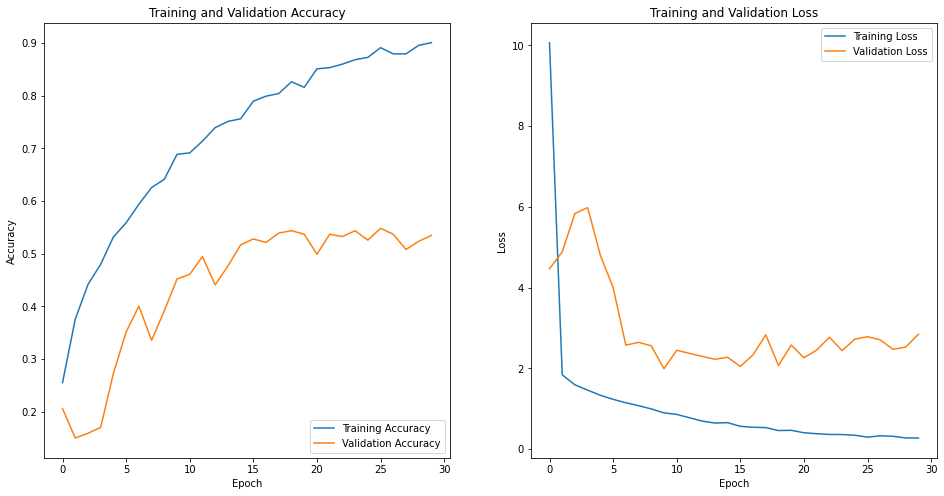

In [51]:
#Visualize the model results
visualize_results (history, epochs)

<font color=blue> Observation: </font> Using an additional block of convolution layers with 256 output features has improved validation accuracy to 53.5%

##### <font color=brown> Model 7: </font> The previous model with 50 epochs

In [52]:
#Build the model
model = get_model(bn=True, dropout=True, features_256=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_22 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_23 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 90, 90, 64)      

In [53]:
#Train the model
epochs = 50
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/50
56/56 [==============================] - 16s 274ms/step - loss: 8.1629 - accuracy: 0.2522 - val_loss: 5.5877 - val_accuracy: 0.1499
Epoch 2/50
56/56 [==============================] - 15s 269ms/step - loss: 1.7818 - accuracy: 0.3956 - val_loss: 6.9510 - val_accuracy: 0.1477
Epoch 3/50
56/56 [==============================] - 15s 274ms/step - loss: 1.6229 - accuracy: 0.4475 - val_loss: 9.4119 - val_accuracy: 0.1499
Epoch 4/50
56/56 [==============================] - 15s 274ms/step - loss: 1.4733 - accuracy: 0.5006 - val_loss: 5.3445 - val_accuracy: 0.2036
Epoch 5/50
56/56 [==============================] - 15s 270ms/step - loss: 1.3703 - accuracy: 0.5218 - val_loss: 4.9821 - val_accuracy: 0.2349
Epoch 6/50
56/56 [==============================] - 15s 272ms/step - loss: 1.2761 - accuracy: 0.5491 - val_loss: 6.4814 - val_accuracy: 0.2483
Epoch 7/50
56/56 [==============================] - 15s 269ms/step - loss: 1.1859 - accuracy: 0.5658 - val_loss: 3.3964 - val_accuracy: 0.3870

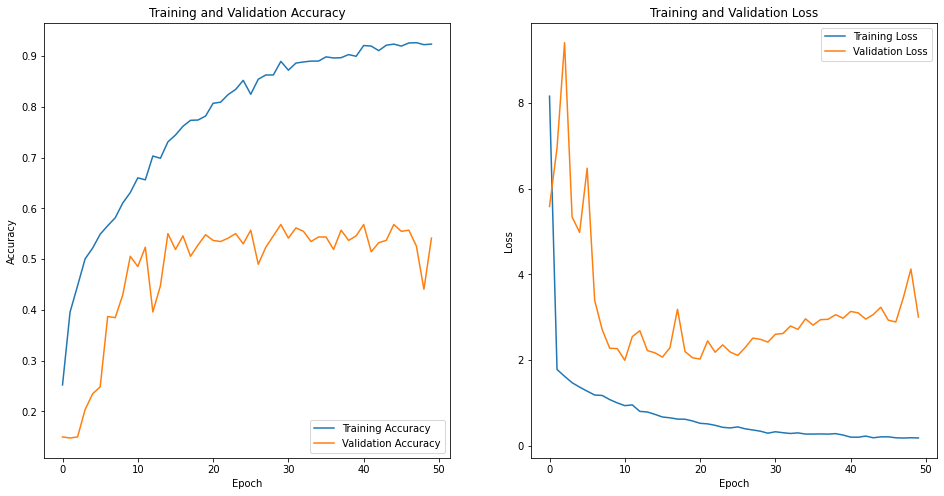

In [54]:
#Visualize the model results
visualize_results (history, epochs)

<font color=blue> Observation: </font> Using extra epochs has not provided any additional benefits in validation accuracy. Instead it is creating heavy overfitting

#### <font color=blue> Step 7: </font> Evaluate the model on the test dataset

<font color=blue> Observation: </font> The final model chosen is with augmented data, with batch normalization, with dropouts, without LC2 and with 20 epochs

In [55]:
#Build the model
model = get_model(bn=True, dropout=True, features_256=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_28 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_29 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 90, 90, 64)      

In [56]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 16s 274ms/step - loss: 10.4153 - accuracy: 0.2539 - val_loss: 2.7778 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 15s 266ms/step - loss: 1.9968 - accuracy: 0.3856 - val_loss: 7.9191 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 15s 271ms/step - loss: 1.7265 - accuracy: 0.4152 - val_loss: 8.2656 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 15s 270ms/step - loss: 1.5575 - accuracy: 0.4548 - val_loss: 8.0670 - val_accuracy: 0.1655
Epoch 5/20
56/56 [==============================] - 15s 270ms/step - loss: 1.4331 - accuracy: 0.5028 - val_loss: 3.9505 - val_accuracy: 0.2573
Epoch 6/20
56/56 [==============================] - 15s 270ms/step - loss: 1.2996 - accuracy: 0.5391 - val_loss: 4.2400 - val_accuracy: 0.2953
Epoch 7/20
56/56 [==============================] - 15s 276ms/step - loss: 1.2689 - accuracy: 0.5435 - val_loss: 3.4575 - val_accuracy: 0.362

In [57]:
#Creating Evaluation Dataset
eval_ds = image_dataset_from_directory(
    test_dir,
    class_names = class_names,
    color_mode  =  'rgb',
    image_size  = (img_height, img_width),
    validation_split = None
)

Found 118 files belonging to 9 classes.


In [58]:
test_loss, test_acc = model.evaluate (eval_ds, verbose=2)
print('\nTest accuracy:', test_acc)

4/4 - 6s - loss: 4.4631 - accuracy: 0.3390 - 6s/epoch - 1s/step

Test accuracy: 0.33898305892944336


<font color=blue> Conclusion: </font> The final accuracy achieved on the test dataset is about 34%. This is not very good. There is a lot of scope for further improvement.

The training dataset is small in size. Only about 2300 original images and about 4500 images after augmentation. This could be the reason that the accuracy is low. Using pre-trained models could be one way of improving accuracy, as they are trained on a huge dataset of about a million images.